<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nienadzorowane/4_Detekcja_anomalii/1_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Local outlier factor
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)

### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go

sns.set(font_scale=1.2)
np.random.seed(10)

### <a name='1'></a> Wygenerowanie danych

In [4]:
data = make_blobs(n_samples=300, cluster_std=2.0, random_state=10)[0]
data[:5]

array([[  4.64616033,   5.03253239],
       [  1.81963552,  -5.03357756],
       [  0.89059085,   3.41070216],
       [  0.61174827,   2.26068253],
       [  6.01229431, -10.52657552]])

### <a name='2'></a> Wizualizacja danych

In [5]:
tmp = pd.DataFrame(data=data, columns=['x1', 'x2'])
px.scatter(tmp, 'x1', 'x2', width=950, title='Local Outlier Factor', template='plotly_dark')

In [7]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, 'x1', 'x2', width=700, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, 'x1', 'x2', width=700, title='Outliers', opacity=0.5)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_traces(marker=dict(size=4, line=dict(width=2, color='white')), selector=dict(mode='markers'))
fig.update_layout(template='plotly_dark', width=950)
fig.show()

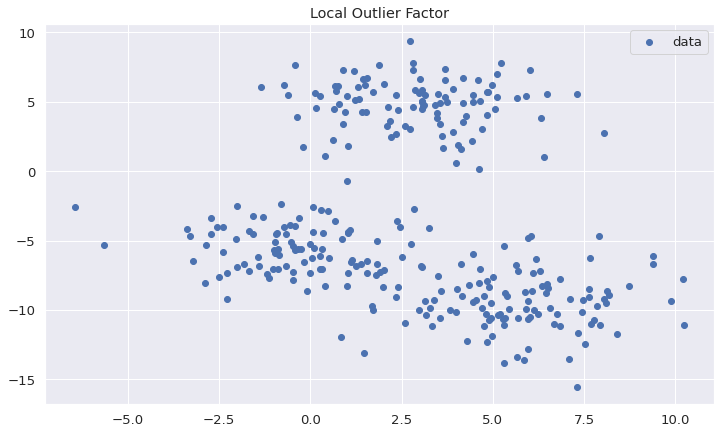

In [13]:
plt.figure(figsize=(12, 7))
plt.scatter(data[:, 0], data[:, 1], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [15]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(data)
y_pred[:10]
#1 - obiekt normalny, -1 - obiekt outlier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
all_data = np.c_[data, y_pred]
all_data[:5]

array([[  4.64616033,   5.03253239,   1.        ],
       [  1.81963552,  -5.03357756,   1.        ],
       [  0.89059085,   3.41070216,   1.        ],
       [  0.61174827,   2.26068253,   1.        ],
       [  6.01229431, -10.52657552,   1.        ]])

In [17]:
tmp['y_pred'] = y_pred
px.scatter(tmp, 'x1', 'x2', color='y_pred', width=950, title='Local Outlier Factor', 
           template='plotly_dark')

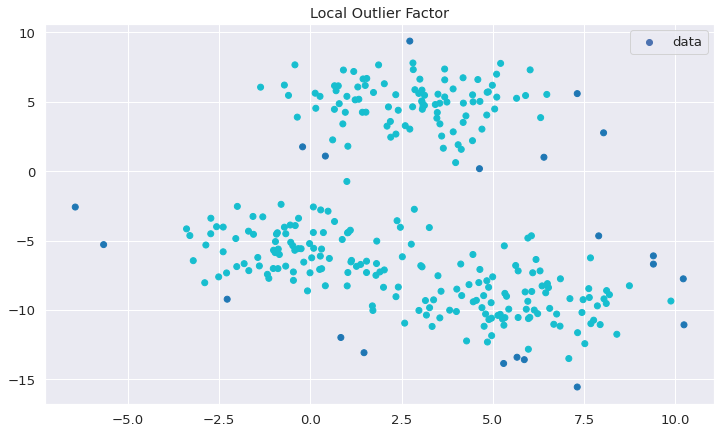

In [18]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [21]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.03834082, 0.12830657, 0.1180624 , 0.24543848, 0.01556816])

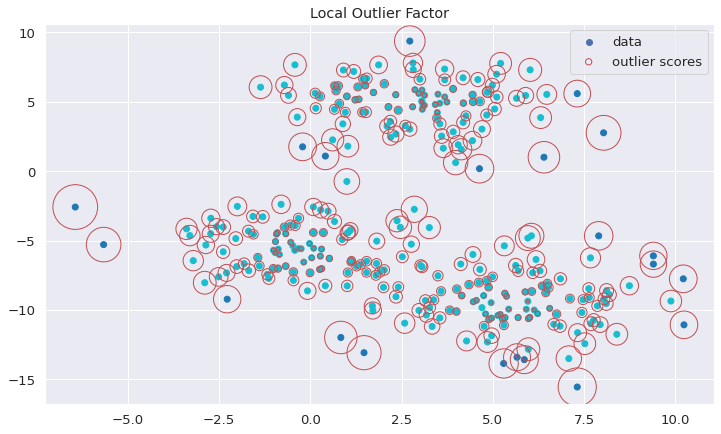

In [24]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()